# Часть 3: Проверка гипотез

## 1. Основные цели:
1. Сформулируйте гипотезы по вашим данным (не менее двух).
2. Проверьте их с помощью одного из статистических тестов
3. Какие выводы можно сделать?


## 2. Подготовка датасета на основании второй части EDA

In [1]:
# Системные библиотеки
import os

# Библиотеки со статистическими инструментами
import numpy as np
import pandas as pd
import scipy.stats as ss

# Библиотеки для рисования
import seaborn as sns
import matplotlib.pyplot as plt

# Готовая линейная регрессия
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(f'{os.getcwd()}/data_eda_merged.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1455 non-null   object 
 1   average_rating       1455 non-null   float64
 2   director             1455 non-null   object 
 3   writer               1455 non-null   object 
 4   metascore            1455 non-null   int64  
 5   cast                 1455 non-null   object 
 6   country_of_origin    1455 non-null   object 
 7   languages            1455 non-null   object 
 8   runtime              1455 non-null   int64  
 9   genre                1455 non-null   object 
 10  budget               1455 non-null   int64  
 11  worldwide_gross      1455 non-null   int64  
 12  release_year         1455 non-null   int64  
 13  profit_or_loss       1455 non-null   int64  
 14  p&l_rate             1455 non-null   float64
 15  lang_cnt             1455 non-null   i

In [4]:
df = df.drop(columns=['writer_2', 'writer_3', 'writer_4', 'writer_5'])
df = df.drop(columns=['cast_2', 'cast_3', 'cast_4', 'cast_5'])
df = df.drop(columns=['language_2', 'language_3', 'language_4', 'language_5'])
df = df.drop(columns=['genre_2', 'genre_3', 'genre_4', 'genre_5'])
df = df.drop(columns=['country_of_origin_2', 'country_of_origin_3', 'country_of_origin_4', 'country_of_origin_5'])

In [5]:
df.columns

Index(['title', 'average_rating', 'director', 'writer', 'metascore', 'cast',
       'country_of_origin', 'languages', 'runtime', 'genre', 'budget',
       'worldwide_gross', 'release_year', 'profit_or_loss', 'p&l_rate',
       'lang_cnt', 'country_cnt', 'coproduction', 'writer_1', 'cast_1',
       'language_1', 'genre_1', 'country_of_origin_1'],
      dtype='object')

In [6]:
for col in ['director', 'coproduction', 'writer_1', 'cast_1', 'language_1', 'genre_1', 'country_of_origin_1']:
    df[col] = df[col].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                1455 non-null   object  
 1   average_rating       1455 non-null   float64 
 2   director             1455 non-null   category
 3   writer               1455 non-null   object  
 4   metascore            1455 non-null   int64   
 5   cast                 1455 non-null   object  
 6   country_of_origin    1455 non-null   object  
 7   languages            1455 non-null   object  
 8   runtime              1455 non-null   int64   
 9   genre                1455 non-null   object  
 10  budget               1455 non-null   int64   
 11  worldwide_gross      1455 non-null   int64   
 12  release_year         1455 non-null   int64   
 13  profit_or_loss       1455 non-null   int64   
 14  p&l_rate             1455 non-null   float64 
 15  lang_cnt             

In [8]:
df.isnull().sum()

title                  0
average_rating         0
director               0
writer                 0
metascore              0
cast                   0
country_of_origin      0
languages              0
runtime                0
genre                  0
budget                 0
worldwide_gross        0
release_year           0
profit_or_loss         0
p&l_rate               0
lang_cnt               0
country_cnt            0
coproduction           0
writer_1               0
cast_1                 0
language_1             6
genre_1                0
country_of_origin_1    0
dtype: int64

In [9]:
df[df['language_1'].isnull() == True]

,title,average_rating,director,writer,metascore,cast,country_of_origin,languages,runtime,genre,...,profit_or_loss,p&l_rate,lang_cnt,country_cnt,coproduction,writer_1,cast_1,language_1,genre_1,country_of_origin_1
39,City Lights,8.5,Charles Chaplin,"Charles Chaplin, Harry Carr, Harry Crocker",99,"Virginia Cherrill, Florence Lee, Harry Myers,...",United States,"None, English",87,"Comedy, Drama, Romance",...,-1444846,-96.32,2,1,0,Charles Chaplin,Virginia Cherrill,NaN,Comedy,United States
118,The Kid,8.2,Charles Chaplin,Charles Chaplin,73,"Edna Purviance, Jackie Coogan, Carl Miller, A...",United States,"None, English",68,"Comedy, Drama, Family",...,-208021,-83.21,2,1,0,Charles Chaplin,Edna Purviance,NaN,Comedy,United States
179,Sunrise: A Song of Two Humans,8.1,F.W. Murnau,"Carl Mayer, Hermann Sudermann, Katherine Hilliker",95,"Janet Gaynor, Margaret Livingston, Bodil Rosi...",United States,"None, English",94,"Drama, Romance",...,-78152,-39.08,2,1,0,Carl Mayer,Janet Gaynor,NaN,Drama,United States
180,The Gold Rush,8.1,Charles Chaplin,Charles Chaplin,73,"Mack Swain, Tom Murray, Henry Bergman, Malcol...",United States,"None, English",95,"Adventure, Comedy, Drama",...,-891510,-96.59,2,1,0,Charles Chaplin,Mack Swain,NaN,Adventure,United States
183,The Circus,8.1,Charles Chaplin,Charles Chaplin,90,"Merna Kennedy, Al Ernest Garcia, Harry Crocke...",United States,"None, English",72,"Comedy, Family, Romance",...,-868282,-96.48,2,1,0,Charles Chaplin,Merna Kennedy,NaN,Comedy,United States
544,The Unknown,7.7,Tod Browning,"Tod Browning, Waldemar Young, Joseph Farnham",73,"Norman Kerry, Joan Crawford, Nick De Ruiz, Jo...",United States,"None, English",63,"Drama, Horror, Romance",...,-212159,-97.77,2,1,0,Tod Browning,Norman Kerry,NaN,Drama,United States


In [48]:
df.loc[df['language_1'].isnull() == True, 'language_1'] = 'English'

In [10]:
df.head()

,title,average_rating,director,writer,metascore,cast,country_of_origin,languages,runtime,genre,...,profit_or_loss,p&l_rate,lang_cnt,country_cnt,coproduction,writer_1,cast_1,language_1,genre_1,country_of_origin_1
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82,"Morgan Freeman, Bob Gunton, William Sadler, C...",United States,English,142,Drama,...,4332133,17.33,1,1,0,Stephen King,Morgan Freeman,English,Drama,United States
1,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100,"Al Pacino, James Caan, Diane Keaton, Richard ...",United States,"English, Italian, Latin",175,"Crime, Drama",...,244342198,4072.37,3,1,0,Mario Puzo,Al Pacino,English,Crime,United States
2,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84,"Heath Ledger, Aaron Eckhart, Michael Caine, M...","United States, United Kingdom","English, Mandarin",152,"Action, Crime, Drama",...,824053678,445.43,2,2,1,Jonathan Nolan,Heath Ledger,English,Action,United States
3,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95,"Ralph Fiennes, Ben Kingsley, Caroline Goodall...",United States,"English, Hebrew, German, Polish, Latin",195,"Biography, Drama, History",...,300161245,1364.37,5,1,0,Thomas Keneally,Ralph Fiennes,English,Biography,United States
4,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97,"Lee J. Cobb, Martin Balsam, John Fiedler, E.G...",United States,English,96,"Crime, Drama",...,-347055,-99.16,1,1,0,Reginald Rose,Lee J. Cobb,English,Crime,United States


In [11]:
df.describe()

,average_rating,metascore,runtime,budget,worldwide_gross,release_year,profit_or_loss,p&l_rate,lang_cnt,country_cnt
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1455.000000,1.455000e+03,1455.000000,1455.000000,1455.000000
mean,7.609759,73.377320,121.134021,3.078353e+07,1.275457e+08,1997.533333,9.676220e+07,474.996893,1.957388,1.674227
std,0.357549,12.526666,24.259159,4.636157e+07,2.474767e+08,21.534434,2.125636e+08,1606.678629,1.293130,1.122357
min,7.200000,25.000000,2.000000,2.500000e+03,1.900000e+01,1920.000000,-1.580311e+08,-100.000000,1.000000,1.000000
25%,7.300000,66.000000,105.000000,3.600000e+06,5.651243e+06,1986.500000,-5.185755e+05,-22.655000,1.000000,1.000000
50%,7.500000,73.000000,119.000000,1.400000e+07,3.469875e+07,2004.000000,1.893600e+07,150.300000,2.000000,1.000000
75%,7.800000,82.000000,134.000000,3.500000e+07,1.268048e+08,2014.000000,9.339614e+07,446.715000,2.000000,2.000000
max,9.300000,100.000000,271.000000,3.551000e+08,2.923706e+09,2024.000000,2.686706e+09,31662.700000,10.000000,11.000000


## 3. Формулирование статистических гипотез на основании второй части EDA

#### Методология работы со статистическими гипотезами:
1. Формулирование "нулевой" (`H₀`) и альтернативной (`H₁`) гипотез.
2. Анализ распределения.
3. Определение статистических тестов.
4. Статистический критерий `p-value < 0.05` подразумевает, что `H₀` отвергается.
5. Формулирование вывода об анализируемом случае.

#### Кейс 1. Проверка взаимосвязи влияния режиссера на рейтинг картины.
- *H₀*: режиссер **не** влияет на рейтинг картин
- *H₁*: режиссер влияет на рейтинг картин

In [12]:
case_1 = df[['director', 'average_rating']]
case_1.describe()

,average_rating
count,1455.000000
mean,7.609759
std,0.357549
min,7.200000
25%,7.300000
50%,7.500000
75%,7.800000
max,9.300000


In [13]:
director_avg_rating_cnt = case_1.groupby('director')['average_rating'].count().sort_values(ascending=False)
print(f"Топ режиссеров по количеству рейтингов (оцененных снятых картин):\n", director_avg_rating_cnt.head(15))


/tmp/ipykernel_45243/3607243916.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  director_avg_rating_cnt = case_1.groupby('director')['average_rating'].count().sort_values(ascending=False)


Топ режиссеров по количеству рейтингов (оцененных снятых картин):
 director
Steven Spielberg     22
Martin Scorsese      20
Alfred Hitchcock     18
Woody Allen          16
Clint Eastwood       14
Christopher Nolan    12
Stanley Kubrick      10
Ridley Scott         10
Robert Zemeckis       9
Roman Polanski        9
Oliver Stone          9
Peter Jackson         9
Billy Wilder          9
David Lynch           8
Quentin Tarantino     8
Name: average_rating, dtype: int64


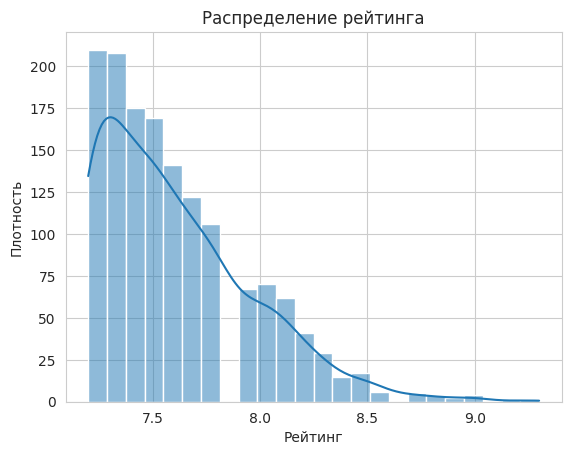

In [14]:
sns.histplot(case_1.average_rating, kde=True)
plt.xlabel('Рейтинг')
plt.ylabel('Плотность')
plt.title('Распределение рейтинга')
plt.show()

In [15]:
case_1 = case_1.assign(log_avg_rating = np.log(df.average_rating))

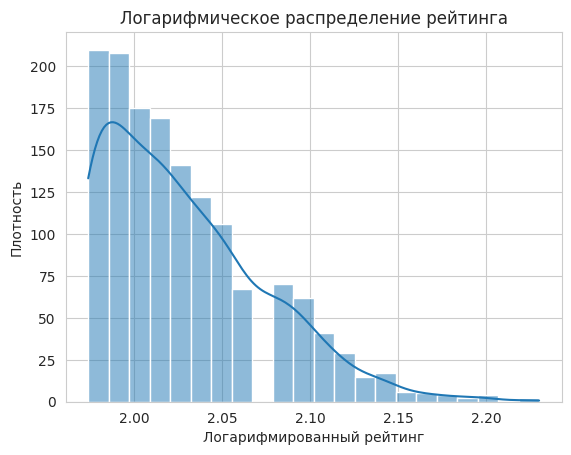

In [16]:
sns.histplot(case_1.log_avg_rating, kde=True)
plt.xlabel('Логарифмированный рейтинг')
plt.ylabel('Плотность')
plt.title('Логарифмическое распределение рейтинга')
plt.show()

Из анализа графиков видно, что нормальное распределение __*отсутствует*__ даже с учетом логарифмирования.
Необходимо убедиться в этом с помощью математического апарата.


In [17]:
director_top_15 = director_avg_rating_cnt.head(15).index.tolist()

In [18]:
h0 = case_1.query('director != @director_top_15')
h1 = case_1.query('director == @director_top_15')

In [19]:
print('Анализ средних значений:')
print(f'Среднее рейтингов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h0.average_rating.mean(),2)}')
print(f'Среднее рейтингов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h1.average_rating.mean(),2)}')

Анализ средних значений:
Среднее рейтингов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов, равно 7.58
Среднее рейтингов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов, равно 7.79


In [20]:
print('Анализ средних значений:')
print(f'Среднее логарифмированных рейтингов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h0.log_avg_rating.mean(),2)}')
print(f'Среднее логарифмированных рейтингов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h1.log_avg_rating.mean(),2)}')

Анализ средних значений:
Среднее логарифмированных рейтингов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов, равно 2.03
Среднее логарифмированных рейтингов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов, равно 2.05


In [21]:
print('Проверка нормальности данных, разделенных на группы без логарифмирования рейтинга')
print(ss.shapiro(h0.average_rating))
print(ss.shapiro(h1.average_rating))

Проверка нормальности данных, разделенных на группы без логарифмирования рейтинга
ShapiroResult(statistic=np.float64(0.9101833591492166), pvalue=np.float64(9.501904526261465e-27))
ShapiroResult(statistic=np.float64(0.9205640568175437), pvalue=np.float64(2.052930939398575e-08))


In [22]:
print('Проверка нормальности данных, разделенных на группы с логарифмированием рейтинга')
print(ss.shapiro(h0.log_avg_rating))
print(ss.shapiro(h1.log_avg_rating))

Проверка нормальности данных, разделенных на группы с логарифмированием рейтинга
ShapiroResult(statistic=np.float64(0.9200614977952241), pvalue=np.float64(2.0781744836359996e-25))
ShapiroResult(statistic=np.float64(0.925918732817487), pvalue=np.float64(5.009251981264995e-08))


In [23]:
print('Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции')
print(ss.levene(h0.average_rating, h1.average_rating))
print(ss.levene(h0.log_avg_rating, h1.log_avg_rating))

Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции
LeveneResult(statistic=np.float64(71.95376384185671), pvalue=np.float64(5.3455941318983576e-17))
LeveneResult(statistic=np.float64(68.49294957944267), pvalue=np.float64(2.849589397470023e-16))


In [24]:
print('Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции')
print(ss.mannwhitneyu(h0.average_rating, h1.average_rating))
print(ss.mannwhitneyu(h0.log_avg_rating, h1.log_avg_rating))

Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции
MannwhitneyuResult(statistic=np.float64(89607.5), pvalue=np.float64(4.0168912640021957e-07))
MannwhitneyuResult(statistic=np.float64(89607.5), pvalue=np.float64(4.0168912640021957e-07))


__*Вывод: Проведенный анализ подтверждает корректность *H₁* "Режиссер влияет на рейтинг картин"*__.
Дальнейший анализ влияния сценариста, ключевого актера, жанра, языка и страны производства по отдельности, скорее всего подтвердит наблюдаемую выше тенденцию.
Опираясь на это утверждение, целесообразно проверить взаимосвязь режиссера с бюджетом и кассовыми сборами, поскольку бюджеты выделяются под "идею" картины, в ходе работы над которой и подбираются "мастера", либо идею ждут своего времени (например, "Аватар" Джеймса Кэмерона).

#### Кейс 2. Проверка взаимосвязи влияния режиссера на бюджет и кассовые сборы.
- *H₀*: режиссер **не** влияет на бюджет и кассовые сборы картин
- *H₁*: режиссер влияет на бюджет и кассовые сборы картин

In [25]:
case_2 = df[['director', 'budget', 'worldwide_gross']]
case_2.describe()

,budget,worldwide_gross
count,1.455000e+03,1.455000e+03
mean,3.078353e+07,1.275457e+08
std,4.636157e+07,2.474767e+08
min,2.500000e+03,1.900000e+01
25%,3.600000e+06,5.651243e+06
50%,1.400000e+07,3.469875e+07
75%,3.500000e+07,1.268048e+08
max,3.551000e+08,2.923706e+09


In [26]:
director_budget_cnt = case_2.groupby('director')['budget'].count().sort_values(ascending=False)
print(f"Топ режиссеров по количеству профинансированных картин:\n", director_budget_cnt.head(15))

/tmp/ipykernel_45243/1399945296.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  director_budget_cnt = case_2.groupby('director')['budget'].count().sort_values(ascending=False)


Топ режиссеров по количеству профинансированных картин:
 director
Steven Spielberg     22
Martin Scorsese      20
Alfred Hitchcock     18
Woody Allen          16
Clint Eastwood       14
Christopher Nolan    12
Stanley Kubrick      10
Ridley Scott         10
Robert Zemeckis       9
Roman Polanski        9
Oliver Stone          9
Peter Jackson         9
Billy Wilder          9
David Lynch           8
Quentin Tarantino     8
Name: budget, dtype: int64


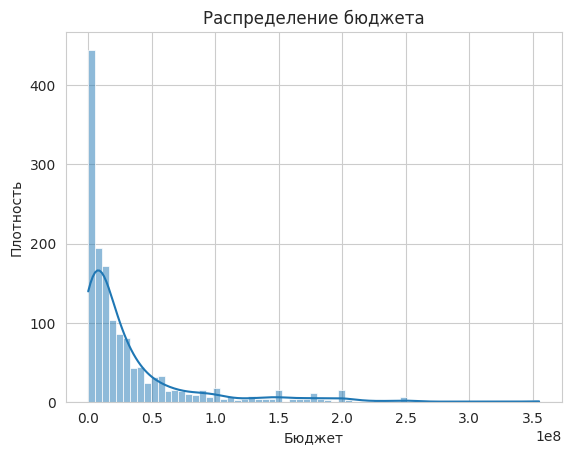

In [27]:
sns.histplot(case_2.budget, kde=True)
plt.xlabel('Бюджет')
plt.ylabel('Плотность')
plt.title('Распределение бюджета')
plt.show()

In [28]:
case_2 = case_2.assign(log_budget = np.log(df.budget))

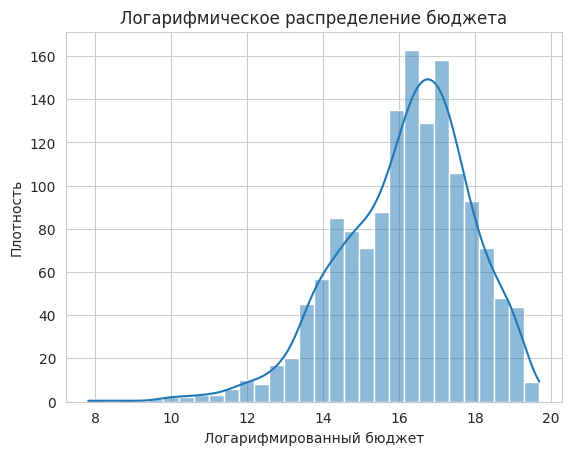

In [29]:
sns.histplot(case_2.log_budget, kde=True)
plt.xlabel('Логарифмированный бюджет')
plt.ylabel('Плотность')
plt.title('Логарифмическое распределение бюджета')
plt.show()

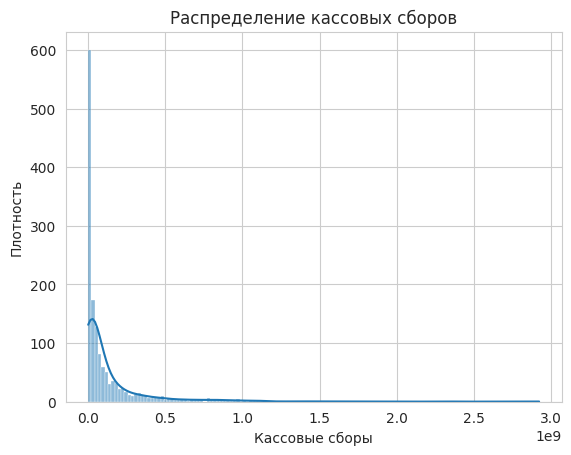

In [30]:
sns.histplot(case_2.worldwide_gross, kde=True)
plt.xlabel('Кассовые сборы')
plt.ylabel('Плотность')
plt.title('Распределение кассовых сборов')
plt.show()

In [31]:
case_2 = case_2.assign(log_worldwide_gross = np.log(df.worldwide_gross))

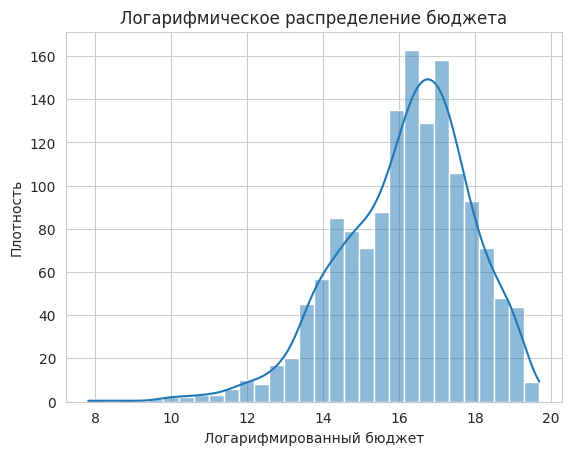

In [32]:
sns.histplot(case_2.log_budget, kde=True)
plt.xlabel('Логарифмированный бюджет')
plt.ylabel('Плотность')
plt.title('Логарифмическое распределение бюджета')
plt.show()

In [33]:
case_2.head()

,director,budget,worldwide_gross,log_budget,log_worldwide_gross
0,Frank Darabont,25000000,29332133,17.034386,17.194194
1,Francis Ford Coppola,6000000,250342198,15.607270,19.338339
2,Christopher Nolan,185000000,1009053678,19.035866,20.732279
3,Steven Spielberg,22000000,322161245,16.906553,19.590563
4,Sidney Lumet,350000,2945,12.765688,7.987864


In [34]:
case_2.describe()

,budget,worldwide_gross,log_budget,log_worldwide_gross
count,1.455000e+03,1.455000e+03,1455.000000,1455.000000
mean,3.078353e+07,1.275457e+08,16.193393,16.412188
std,4.636157e+07,2.474767e+08,1.694239,3.463438
min,2.500000e+03,1.900000e+01,7.824046,2.944439
25%,3.600000e+06,5.651243e+06,15.096444,15.547373
50%,1.400000e+07,3.469875e+07,16.454568,17.362214
75%,3.500000e+07,1.268048e+08,17.370859,18.658149
max,3.551000e+08,2.923706e+09,19.687910,21.796118


In [35]:
director_top_15_case_2 = director_budget_cnt.head(15).index.tolist()

In [36]:
h0_ = case_2.query('director != @director_top_15_case_2')
h1_ = case_2.query('director == @director_top_15_case_2')

In [37]:
print('Анализ средних значений:')
print(f'Среднее бюджетов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h0_.budget.mean(),2)}')
print(f'Среднее бюджетов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h1_.budget.mean(),2)}')
print()
print(f'Среднее логарифмированных бюджетов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h0_.log_budget.mean(),2)}')
print(f'Среднее логарифмированных бюджетов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h1_.log_budget.mean(),2)}')

Анализ средних значений:
Среднее бюджетов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов, равно 29056487.49
Среднее бюджетов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов, равно 42787853.81

Среднее логарифмированных бюджетов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов, равно 16.14
Среднее логарифмированных бюджетов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов, равно 16.58


In [38]:
print('Анализ средних значений:')
print(f'Среднее кассовых сборов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h0_.worldwide_gross.mean(),2)}')
print(f'Среднее кассовых сборов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h1_.worldwide_gross.mean(),2)}')
print()
print(f'Среднее логарифмированных кассовых сборов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h0_.log_worldwide_gross.mean(),2)}')
print(f'Среднее логарифмированных кассовых сборов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов,\
 равно {round(h1_.log_worldwide_gross.mean(),2)}')

Анализ средних значений:
Среднее кассовых сборов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов, равно 120416749.18
Среднее кассовых сборов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов, равно 177097939.99

Среднее логарифмированных кассовых сборов картин, снятых режиссерами, не входящими в топ-15 по количеству снятых фильмов, равно 16.38
Среднее логарифмированных кассовых сборов картин, снятых режиссерами, входящими в топ-15 по количеству снятых фильмов, равно 16.66


In [39]:
print('Проверка нормальности данных, разделенных на группы без логарифмирования бюджета')
print(ss.shapiro(h0_.budget))
print(ss.shapiro(h1_.budget))
print()
print('Проверка нормальности данных, разделенных на группы с логарифмированием бюджета')
print(ss.shapiro(h0_.log_budget))
print(ss.shapiro(h1_.log_budget))

Проверка нормальности данных, разделенных на группы без логарифмирования бюджета
ShapiroResult(statistic=np.float64(0.6279275880453412), pvalue=np.float64(4.858608914671594e-46))
ShapiroResult(statistic=np.float64(0.7597440561488074), pvalue=np.float64(5.234142886176915e-16))

Проверка нормальности данных, разделенных на группы с логарифмированием бюджета
ShapiroResult(statistic=np.float64(0.9738688055770023), pvalue=np.float64(2.0963869444092914e-14))
ShapiroResult(statistic=np.float64(0.9464690897355971), pvalue=np.float64(2.3005319413505437e-06))


In [40]:
print('Проверка нормальности данных, разделенных на группы без логарифмирования кассовых сборов')
print(ss.shapiro(h0_.worldwide_gross))
print(ss.shapiro(h1_.worldwide_gross))
print()
print('Проверка нормальности данных, разделенных на группы с логарифмированием кассовых сборов')
print(ss.shapiro(h0_.log_worldwide_gross))
print(ss.shapiro(h1_.log_worldwide_gross))

Проверка нормальности данных, разделенных на группы без логарифмирования кассовых сборов
ShapiroResult(statistic=np.float64(0.5085468650848834), pvalue=np.float64(1.8663157615077445e-50))
ShapiroResult(statistic=np.float64(0.6993942841943231), pvalue=np.float64(7.036576598496582e-18))

Проверка нормальности данных, разделенных на группы с логарифмированием кассовых сборов
ShapiroResult(statistic=np.float64(0.856177501348553), pvalue=np.float64(1.5530656023846055e-32))
ShapiroResult(statistic=np.float64(0.8358267170896808), pvalue=np.float64(4.3685830462219246e-13))


In [41]:
print('Проверка на равенство дисперсий как без логарифмирования бюджета, так и без это операции')
print(ss.levene(h0_.budget, h1_.budget))
print()
print('Проверка на равенство дисперсий как без логарифмирования кассовых сборов, так и без это операции')
print(ss.levene(h0_.worldwide_gross, h1_.worldwide_gross))

Проверка на равенство дисперсий как без логарифмирования бюджета, так и без это операции
LeveneResult(statistic=np.float64(11.91082395974925), pvalue=np.float64(0.0005740826065967562))

Проверка на равенство дисперсий как без логарифмирования кассовых сборов, так и без это операции
LeveneResult(statistic=np.float64(7.977779192889863), pvalue=np.float64(0.004800184920836188))


In [42]:
print('Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции')
print(ss.mannwhitneyu(h0_.budget, h1_.budget))
print()
print('Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции')
print(ss.mannwhitneyu(h0_.worldwide_gross, h1_.worldwide_gross))

Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции
MannwhitneyuResult(statistic=np.float64(97091.5), pvalue=np.float64(0.0002819609049598175))

Проверка на равенство дисперсий как без логарифмирования рейтинга, так и без это операции
MannwhitneyuResult(statistic=np.float64(102626.0), pvalue=np.float64(0.009613091288168183))


In [43]:
case_2.columns

Index(['director', 'budget', 'worldwide_gross', 'log_budget',
       'log_worldwide_gross'],
      dtype='object')

In [44]:
correlation = np.corrcoef(case_2.budget, case_2.worldwide_gross)[0, 1]
print("Корреляция Пирсона:", correlation)

Корреляция Пирсона: 0.7936112391726786


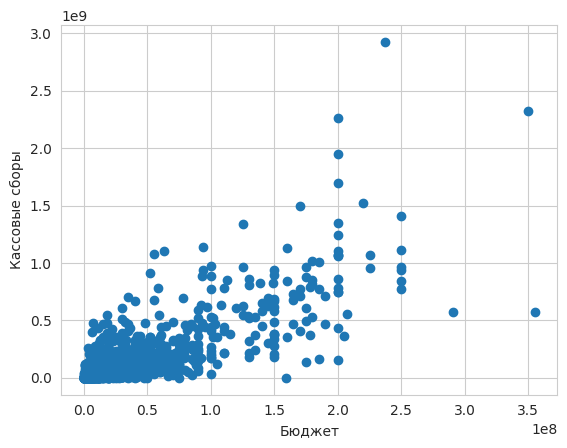

In [45]:
plt.scatter(case_2.budget, case_2.worldwide_gross)
plt.xlabel("Бюджет")
plt.ylabel("Кассовые сборы")
plt.show()

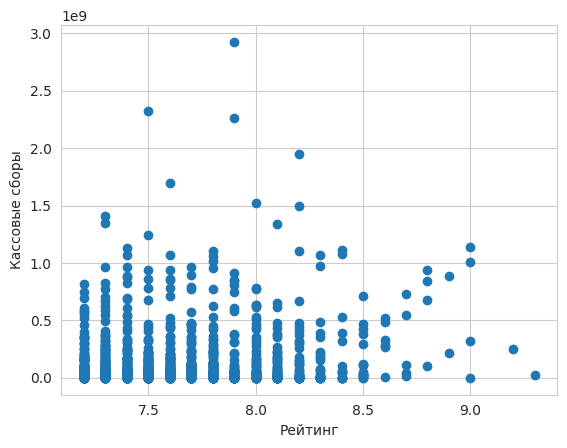

In [46]:
plt.scatter(case_1.average_rating, case_2.worldwide_gross)
plt.xlabel("Рейтинг")
plt.ylabel("Кассовые сборы")
plt.show()

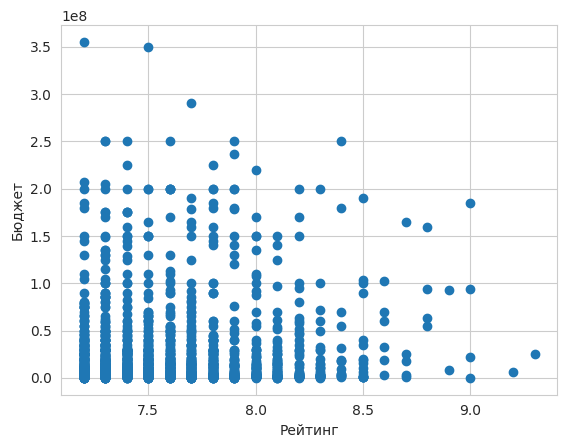

In [47]:
plt.scatter(case_1.average_rating, case_2.budget)
plt.xlabel("Рейтинг")
plt.ylabel("Бюджет")
plt.show()

__*Вывод: Проведенный анализ подтверждает корректность *H₁* "Режиссер влияет на бюджет и кассовые сборы картин"*__.


## В качестве продолжения работы, необходимо спрогнозировать рейтинги и кассовые сборы с помощью моделей линейной регрессии.